In [124]:
# import os
# i = 1
# file_names='rock'
# file_path = 'rock/'
# for name in file_names:
#     src = os.path.join(file_path, name)
#     dst = str(i) + '.jpg'
#     dst = os.path.join(file_path, dst)
#     os.rename(src, dst)
#     i += 100


In [125]:
# import os
# import glob

# file_path = 'C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/rock'  # 이미지 파일이 있는 디렉토리 경로
# os.chdir(file_path)  # 작업 디렉토리 변경

# files = glob.glob('*.jpg')  # jpg 이미지 파일만 선택하여 리스트로 반환

# for i, file in enumerate(files, start=808):  # 101부터 시작
#     os.rename(file, f'{i}.jpg')  # 파일 이름 변경

In [126]:
# import os
# import glob

# file_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/scissor"  # 이미지 파일이 있는 디렉토리 경로
# os.chdir(file_path)  # 작업 디렉토리 변경

# files = glob.glob('*.jpg')  # jpg 이미지 파일만 선택하여 리스트로 반환

# for i, file in enumerate(files, start=821):  # 101부터 시작
#     os.rename(file, f'{i}.jpg')  # 파일 이름 변경

In [127]:
# import os
# import glob

# file_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/paper"  # 이미지 파일이 있는 디렉토리 경로
# os.chdir(file_path)  # 작업 디렉토리 변경

# files = glob.glob('*.jpg')  # jpg 이미지 파일만 선택하여 리스트로 반환

# for i, file in enumerate(files, start=806):  # 101부터 시작
#     os.rename(file, f'{i}.jpg')  # 파일 이름 변경

In [128]:

import tensorflow as tf
import numpy as np
from PIL import Image
import glob
import os
#데이터의 사이즈를 28x28의 사이즈로 각각 바꿔서 저장한다.
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.BILINEAR)# ANTIALIAS 모듈을 찾을수없다고 오류가 떠서 대신 BILINEAR 사용
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/train/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


1064  images to be resized.
1064  images resized.
가위 이미지 resize 완료!


In [129]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.BILINEAR)# ANTIALIAS 모듈을 찾을수없다고 오류가 떠서 대신 BILINEAR 사용
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/train/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1053  images to be resized.
1053  images resized.
바위 이미지 resize 완료!


In [130]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.BILINEAR)# ANTIALIAS 모듈을 찾을수없다고 오류가 떠서 대신 BILINEAR 사용
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/train/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1073  images to be resized.
1073  images resized.
보 이미지 resize 완료!


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image
import glob
import os
#바뀐 가위,바위,보 의 데이터300개를 x_train,y_train데이터에 (학습데이터)에 할당해준다.

def load_data(img_path, number_of_data=3190):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/train"
#os.getenv("HOME") + "/aiffel/rock_scissor_paper"
#이미지데이터의 최솟값,최댓값을 확인후 0,1사이의 정규화를 통해 데이터를 정규화 시켜준다.

(x_train, y_train)=load_data(image_dir_path)
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3190 입니다.
최소값: 0  최대값: 255
x_train shape: (3190, 28, 28, 3)
y_train shape: (3190,)


라벨:  0


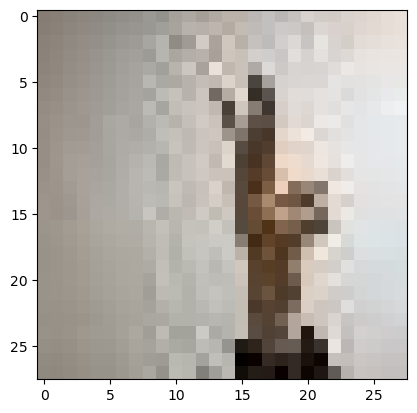

In [132]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [342]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
#각층에 활성화함수로relu를 쓰기때문에 가중치 초깃값을 he초깃값사용
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3),  activation='relu' , kernel_initializer='he_normal',input_shape=(28,28,3)))
#, activation='relu'
# model.add(BatchNormalization())
# model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))
# model.add(Dropout(0.25))# Dropout 추가 # 드롭아웃을 합성곱층마다 실행했더니 오히려 정확도가 떨어져서 값을 조정해도 나아지지않아 처음층의 드롭아웃은 안하기로함.
model.add(keras.layers.Conv2D(64, (3,3), activation='relu' ,kernel_initializer='he_normal'))
# model.add(BatchNormalization()
# model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(Dropout(0.25)) # Dropout 추가
# model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(Dropout(0.25)) # Dropout 추가
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(keras.layers.Activation('relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

In [343]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
x_train_reshaped=x_train.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
#처음에 reshape(-1.28,28,1)을 설정 했는대 reshape의 의미를 알고 컬러이미지이니rgb색상에 맞추어 3으로 바꿔주었더니 오류가 사라졌다.
#x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_train,y_train),epochs=15,callbacks=[early_stopping])

model.summary()

Epoch 1/15
100/100 [==============================] - 1s 13ms/step - loss: 31.2040 - accuracy: 0.4019 - val_loss: 0.9081 - val_accuracy: 0.5702
Epoch 2/15
100/100 [==============================] - 1s 13ms/step - loss: 0.9909 - accuracy: 0.5069 - val_loss: 0.8334 - val_accuracy: 0.5884
Epoch 3/15
100/100 [==============================] - 1s 14ms/step - loss: 0.9151 - accuracy: 0.5370 - val_loss: 0.7912 - val_accuracy: 0.6464
Epoch 4/15
100/100 [==============================] - 1s 14ms/step - loss: 0.8625 - accuracy: 0.5661 - val_loss: 0.6959 - val_accuracy: 0.7191
Epoch 5/15
100/100 [==============================] - 1s 14ms/step - loss: 0.8242 - accuracy: 0.6132 - val_loss: 0.5915 - val_accuracy: 0.7755
Epoch 6/15
100/100 [==============================] - 1s 13ms/step - loss: 0.7634 - accuracy: 0.6339 - val_loss: 0.5916 - val_accuracy: 0.7589
Epoch 7/15
100/100 [==============================] - 1s 13ms/step - loss: 0.7346 - accuracy: 0.6514 - val_loss: 0.6120 - val_accuracy: 0.735

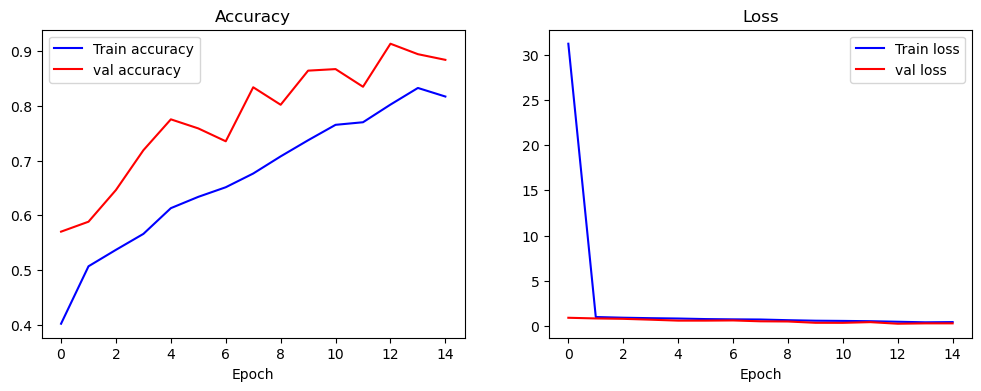

In [344]:
# #학습 정확도
# plt.plot(history.history['accuracy'],label = 'train')
# plt.plot(history.history['val_accuracy'],label = 'val')
# plt.xlabel('epochs')
# plt.ylabel('accuracy')
# plt.legend()
# 정확도 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='Train accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='Train loss')
plt.plot(history.history['val_loss'], 'r-', label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [262]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
#test데이터가 있는 경로에 이미지 파일들을 각각 불러와서 resized시킨다.
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.BILINEAR)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.BILINEAR)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
image_dir_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.BILINEAR)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
image_dir_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

def load_data2(img_path, number_of_data=3190):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_val)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "C:/Users/jbsb1/OneDrive/바탕 화면/coding/aiffel/mainquest/test"
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

1063  images to be resized.
1063  images resized.
가위 이미지 resize 완료!
1052  images to be resized.
1052  images resized.
바위 이미지 resize 완료!
1072  images to be resized.
1072  images resized.
보 이미지 resize 완료!
학습데이터(x_val)의 이미지 개수는 3187 입니다.
x_test shape: (3190, 28, 28, 3)
y_test shape: (3190,)


In [345]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
#10/10 - 0s - loss: 1.1013 - accuracy: 0.3333->계속 시도했던 오차와 정확도, 데이터의 수가 적어서 그런지 0.3333에서 거의 변동이 없다가
#드롭아웃과 dense레이어의 채널수를 64로 늘린뒤 
#처음에 0.33에서 더 안나아졌는대 지금은 10/10 - 0s - loss: 1.0981 - accuracy: 0.3600까지 정확도가 올라감
#드롭아웃층 없애고 he초깃값을 사용해서 각층마다 적용한후 각층의 채널수를 128로 늘림 10/10 - 0s - loss: 1.0568 - accuracy: 0.4867
#배치정규화를 시도했지만 오히려 정확도가 떨어지고 오버피팅이 일어났다.10/10 - 0s - loss: 2.9117 - accuracy: 0.3333
#배치정규화를 시도해 정확도를 높이려고했으나 드롭아웃층도 넣고 다시돌려도 오차가 더 커졌다.10/10 - 0s - loss: 5.3181 - accuracy: 0.3333
#다시 he초깃값을 사용하여 모델에 학습시켰더니 정확도가 올라가서 오버피팅인지 아닌지 에폭수를 줄여 다시 돌려보기로했다.10/10 - 0s - loss: 1.0603 - accuracy: 0.6667
#에폭수를 25에서 10으로 줄였더니 정확도가 올라간걸로봐서 오버피팅이 일어난거같다. 오차는 조금커졌는대 정확도가 올라갔다.10/10 - 0s - loss: 1.0735 - accuracy: 0.7167
#에폭수10으로 조정후 드롭아웃층을 마지막 출력층 전에만 추가하였다.10/10 - 0s - loss: 1.0845 - accuracy: 0.6633
#학습데이터가 너무많고 시험데이터가 너무없어서 오버피팅이 일어날수있으니 한번 확인해보자.(데이터증강 시도)100/100 - 1s - loss: 1.0823 - accuracy: 0.5229
#에폭수만 다시 10에서25로 늘렸더니 정확도가 떨어짐100/100 - 1s - loss: 1.0583 - accuracy: 0.4097
#에폭수를 20으로 줄였더니 정확도가 떨어짐 100/100 - 1s - loss: 1.0705 - accuracy: 0.3361
#에폭수는 그대로 20으로 두고 마지막 출력층의 드롭아웃층만 없앴더니 정확도가 대폭 상향됨100/100 - 1s - loss: 1.0421 - accuracy: 0.9263(드롭아웃층 없으니 오버피팅일어난거같음)
#에폭수를 15로 줄였더니 정확도가 떨어짐100/100 - 1s - loss: 1.0566 - accuracy: 0.8110
#에폭수25에 출력층에 드롭아웃층 적용 100/100 - 1s - loss: 1.0554 - accuracy: 0.5944
#에폭수20에 출력층 드롭아웃 적용, 합성곱층 2번째층 128에서64로조정 100/100 - 0s - loss: 1.0905 - accuracy: 0.3690
# 에폭수25에 출력층 드롭아웃 적용, 합성곱층 1번째 64->32조정, 2번째층 64, 3번쨰128,4번쨰128: 100/100 - 0s - loss: 1.0564 - accuracy: 0.8028
# 에폭수20에 출력층 드롭아웃 적용, 합성곱층 1번째 64->32조정, 2번째층 64, 3번쨰128,4번쨰128 100/100 - 0s - loss: 1.0614 - accuracy: 0.4000
# 에폭수20에 출력층 드롭아웃0.5->0.3 적용, 합성곱층 1번째 64->32조정, 2번째층 64, 3번쨰128,4번쨰128   100/100 - 0s - loss: 1.0606 - accuracy: 0.4276
#에폭수20에 출력층 드롭아웃0.5->0.3 적용, 합성곱층 1번째 64, 2번째층 64, 3번쨰128,4번쨰128  100/100 - 1s - loss: 1.0656 - accuracy: 0.4928
#에폭수20에 출력층 드롭아웃0.5->0.3 적용, 합성곱층 1번째 64, 2번째층 128, 3번쨰128,4번쨰128 100/100 - 1s - loss: 1.3620 - accuracy: 0.3342 합성곱층을 채널수를 늘렸더니 오버피팅된거같이 정확도가 떨어짐
#에폭수20에 출력층 드롭아웃0.3적용, 합성곱층 1번째 32,2번쨰64,3번쨰128,4번쨰128 적용 100/100 - 0s - loss: 1.0639 - accuracy: 0.6433
#에폭수25에 출력층 드롭아웃0.3적용, 합성곱층 1번째 32,2번쨰64,3번쨰128,4번쨰128 적용 100/100 - 0s - loss: 1.0582 - accuracy: 0.8169(검증데이터 증가폿을보니 오버피팅된거같음)
#에폭수15에 출력층 드롭아웃0.3적용, 합성곱층 1번째 32,2번쨰64,3번쨰128,4번쨰128 적용 100/100 - 0s - loss: 1.0824 - accuracy: 0.4492


100/100 - 0s - loss: 1.0824 - accuracy: 0.4492


## 결론
- k: 적절한 하이퍼파라미터값과 에폭수 그리고 드롭아웃의 여부와 어디에 적용시킬건지 가중치초깃값을 어떻게 설정할것인지 배운것들을 적절히 잘 찾으려고 시간을 많이 써서 실험해보았다.
- p: 아무래도 데이터를 직접 만들거나 다른 동료분들의 데이터를 가져온다해도 수가 많지않아 적절히 학습된건지 오버피팅이된건지 값이 너무 왔다갔다해서 중간값을 찾기 힘들고 시간이 오래걸렸다. 시험데이터가 부족해서 데이터 증강법을 활용해 데이터들을 반전시킨후 사용한것이 조금아쉽다.
- t: 시간이 많거나 데이터가 많으면 다시 조정해보는 작업을해서 오버피팅없이 정확도90퍼를 넘겨보고싶다.


In [137]:
# # model을 학습시키는 코드를 직접 작성해 보세요.
# # Hint! model.compile()과 model.fit()을 사용해 봅시다.
# x_test_reshaped=x_test.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
# #처음에 reshape(-1.28,28,1)을 설정 했는대 reshape의 의미를 알고 컬러이미지이니rgb색상에 맞추어 3으로 바꿔주었더니 오류가 사라졌다.
# #x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# history = model.fit(x_test, y_test, epochs=25)
# model.summary()

Epoch 1/25
100/100 [==============================] - 2s 20ms/step - loss: 1.2559 - accuracy: 0.8589
Epoch 2/25
100/100 [==============================] - 2s 19ms/step - loss: 0.2157 - accuracy: 0.9455
Epoch 3/25
100/100 [==============================] - 2s 20ms/step - loss: 0.1829 - accuracy: 0.9489
Epoch 4/25
100/100 [==============================] - 2s 20ms/step - loss: 0.2445 - accuracy: 0.9433
Epoch 5/25
100/100 [==============================] - 2s 20ms/step - loss: 0.5489 - accuracy: 0.8890
Epoch 6/25
100/100 [==============================] - 2s 20ms/step - loss: 0.0933 - accuracy: 0.9727
Epoch 7/25
100/100 [==============================] - 2s 20ms/step - loss: 0.0472 - accuracy: 0.9853
Epoch 8/25
100/100 [==============================] - 2s 20ms/step - loss: 0.0223 - accuracy: 0.9950
Epoch 9/25
100/100 [==============================] - 2s 20ms/step - loss: 0.0325 - accuracy: 0.9897
Epoch 10/25
100/100 [==============================] - 2s 20ms/step - loss: 0.0495 - accura